# NEXP2X - Elspot analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pwd
# Verify actual working directory

'C:\\Users\\Marco Saretta\\Desktop\\Hybrid Greentech\\NEXP2X\\Project'

# 1 - DATA COLLECTION

In [2]:
df_2017 = pd.read_csv('Data/Prices/elspotprices_2017.csv')
df_2018 = pd.read_csv('Data/Prices/elspotprices_2018.csv')
df_2019 = pd.read_csv('Data/Prices/elspotprices_2019.csv')
df_2020 = pd.read_csv('Data/Prices/elspotprices_2020.csv')
df_2021 = pd.read_csv('Data/Prices/elspotprices_2021.csv')
df_2022 = pd.read_csv('Data/Prices/elspotprices_2022.csv')

In [3]:
frames = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

raw_data = pd.concat(frames, axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)
raw_data
raw_data = raw_data[['HourUTC', 'PriceArea', 'SpotPriceEUR']]
raw_data['HourUTC'] = pd.to_datetime(raw_data['HourUTC'])
raw_data = raw_data.pivot(index='HourUTC', columns='PriceArea', values='SpotPriceEUR')
raw_data

PriceArea,AT,BE,DE,DK1,DK2,FR,GB2,GER,NL,NO2,SE3,SE4,SYSTEM
HourUTC,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,NaN,NaN,20.90,20.90,20.90,NaN,NaN,NaN,NaN,28.17,24.03,24.03,25.61
2017-01-01 01:00:00+00:00,NaN,NaN,18.13,18.13,18.13,NaN,NaN,NaN,NaN,28.03,24.02,24.02,25.49
2017-01-01 02:00:00+00:00,NaN,NaN,16.03,16.03,16.03,NaN,NaN,NaN,NaN,28.00,23.19,23.19,25.25
2017-01-01 03:00:00+00:00,NaN,NaN,16.43,16.43,16.43,NaN,NaN,NaN,NaN,28.02,24.10,24.10,25.63
2017-01-01 04:00:00+00:00,NaN,NaN,13.75,13.75,13.75,NaN,NaN,NaN,NaN,28.14,25.01,25.01,25.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-20 17:00:00+00:00,NaN,NaN,NaN,249.00,249.00,NaN,NaN,NaN,NaN,198.94,69.88,69.88,185.71
2022-04-20 18:00:00+00:00,NaN,NaN,NaN,250.00,250.00,NaN,NaN,NaN,NaN,200.22,69.81,69.81,185.87
2022-04-20 19:00:00+00:00,NaN,NaN,NaN,239.18,239.18,NaN,NaN,NaN,NaN,198.08,69.01,69.01,185.43


In [4]:
elspot = pd.DataFrame()
elspot = raw_data.copy()

elspot.columns.name = None                     # remove categories
elspot = elspot.reset_index()                  # index to columns
elspot = elspot.set_index('HourUTC')
elspot.head()

,AT,BE,DE,DK1,DK2,FR,GB2,GER,NL,NO2,SE3,SE4,SYSTEM
HourUTC,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,NaN,NaN,20.90,20.90,20.90,NaN,NaN,NaN,NaN,28.17,24.03,24.03,25.61
2017-01-01 01:00:00+00:00,NaN,NaN,18.13,18.13,18.13,NaN,NaN,NaN,NaN,28.03,24.02,24.02,25.49
2017-01-01 02:00:00+00:00,NaN,NaN,16.03,16.03,16.03,NaN,NaN,NaN,NaN,28.00,23.19,23.19,25.25
2017-01-01 03:00:00+00:00,NaN,NaN,16.43,16.43,16.43,NaN,NaN,NaN,NaN,28.02,24.10,24.10,25.63
2017-01-01 04:00:00+00:00,NaN,NaN,13.75,13.75,13.75,NaN,NaN,NaN,NaN,28.14,25.01,25.01,25.88


Text(0, 0.5, 'Elspot price [€]')

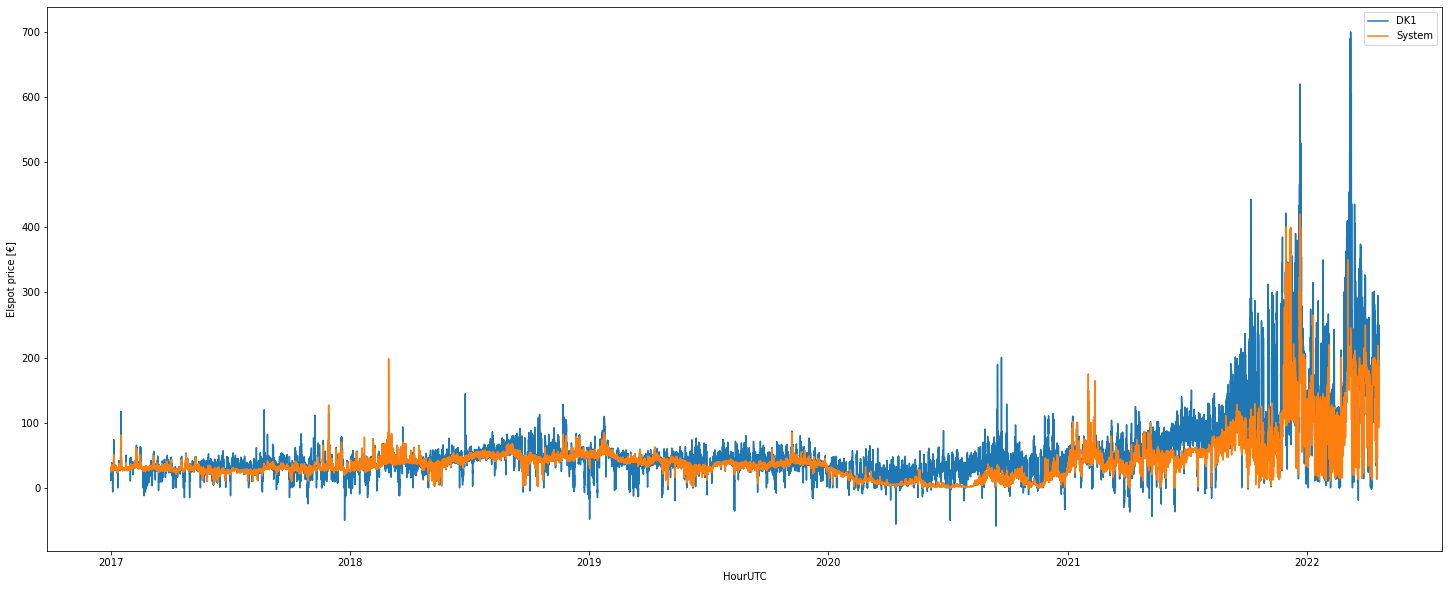

In [5]:
fig = plt.figure(figsize =(25,10))
plt.step(elspot.index, elspot.DK1, label = 'DK1')
plt.step(elspot.index, elspot.SYSTEM, label = 'System')
plt.legend()
plt.xlabel(elspot.index.name)
plt.ylabel('Elspot price [€]')

# Full load hours

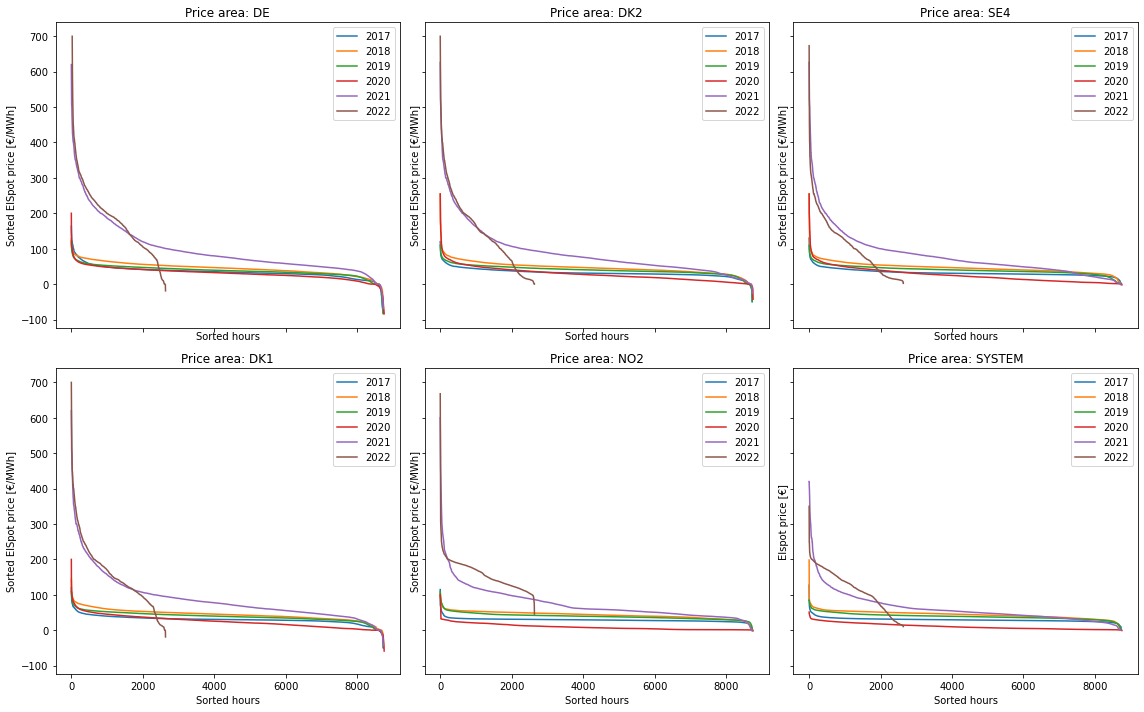

In [6]:
fig, ax = plt.subplots(2, 3, figsize = (16,10), sharey = True, sharex = True)
n_row, n_col = 0, 0
col_list = list(elspot.columns)
indices = (2, 3, 4, 9, 11, 12)
 
col_list = [col_list[i] for i in indices]

FLH = {}

for col in col_list:
    for year in range(elspot.index.year.min(), elspot.index.year.max()+1):
        subset = elspot[elspot.index.year == year]
        data = subset.sort_values(by=str(col), ascending=False, na_position='first')[col].values
        
        FLH["{0}".format(col)] = data
        
        ax[n_row, n_col].plot(data, label = str(year))
        ax[n_row, n_col].legend()
        ax[n_row, n_col].set_title('Price area: '+ str(col))
        ax[n_row, n_col].set_xlabel('Sorted hours')
        ax[n_row, n_col].set_ylabel('Sorted ElSpot price [€/MWh]')
        #ax[n_row, n_col].set_yticks()
    if n_row == 1:
        n_col += 1
        n_row =  0
    else:
        n_row += 1
            
        plt.xlabel('Full load hours')
plt.ylabel('Elspot price [€]')
plt.tight_layout()
plt.savefig('Figures/Historical_spot_prices.png', dpi = 800)

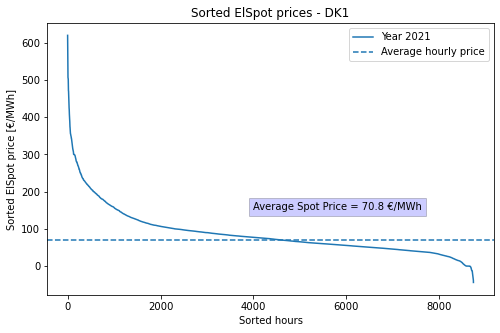

In [7]:
subset = elspot[elspot.index.year == 2021]
data = subset.sort_values(by=str('DK1'), ascending=False, na_position='first')['DK1']
x = range(len(data))
dx = x[1]-x[0]
y = data.values

fig = plt.figure(figsize = (8,5))
plt.plot(x, data, label = 'Year 2021')

plt.title('Sorted ElSpot prices - DK1')
plt.xlabel('Sorted hours')
plt.ylabel('Sorted ElSpot price [€/MWh]')
plt.axhline(y = y[1500:8000].mean(), color='tab:blue', linestyle='dashed', label = 'Average hourly price')
avg_price = np.round(y[1500:8000].mean(), 2)
plt.legend()
plt.text(4000, 150, 'Average Spot Price = '+ str(avg_price) + ' €/MWh', fontsize = 10,  bbox = dict(facecolor = 'blue', alpha = 0.2))
plt.savefig('Figures/Historical_spot_prices_DK1.png', dpi = 800)

# 2 ENERGY BALANCE
## 2.1 Data preparation

In [8]:
raw_data_2016 = pd.read_csv('Data/Energy_balance/electricitybalancenonv_2016_2021.csv')
raw_data_2022 = pd.read_csv('Data/Energy_balance/electricitybalancenonv_2022.csv')
frames = [raw_data_2016, raw_data_2022]

raw_data_enbal = pd.concat(frames, axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

enbal_DK1 = pd.DataFrame()
enbal_DK2 = pd.DataFrame()
enbal_DK1 = raw_data_enbal[raw_data_enbal['PriceArea'] == 'DK1']
enbal_DK2 = raw_data_enbal[raw_data_enbal['PriceArea'] == 'DK2']

enbal_DK1['HourUTC'] = pd.to_datetime(enbal_DK1['HourUTC'])
enbal_DK1.set_index('HourUTC', inplace = True)
#enbal_DK1 = enbal_DK1.drop(columns = ['HourDK', 'PriceArea'])

col_list= ['Biomass', 'HydroPower', 'OtherRenewable', 'SolarPower', 'Waste', 'OnshoreWindPower', 'OffshoreWindPower']
enbal_DK1['Tot_ren'] = enbal_DK1[col_list].sum(axis=1)

col_wind= ['OnshoreWindPower', 'OffshoreWindPower']
enbal_DK1['Tot_wind'] = enbal_DK1[col_list].sum(axis=1)

enbal_DK1

C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_26236/3428632438.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enbal_DK1['HourUTC'] = pd.to_datetime(enbal_DK1['HourUTC'])
C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_26236/3428632438.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enbal_DK1['Tot_ren'] = enbal_DK1[col_list].sum(axis=1)
C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_26236/3428632438.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,HourDK,PriceArea,TotalLoad,Biomass,FossilGas,FossilHardCoal,FossilOil,HydroPower,OtherRenewable,SolarPower,Waste,OnshoreWindPower,OffshoreWindPower,ExchangeContinent,ExchangeGreatBelt,ExchangeNordicCountries,Tot_ren,Tot_wind
HourUTC,,,,,,,,,,,,,,,,,,
2016-12-31 23:00:00+00:00,2017-01-01T00:00:00,DK1,NaN,293.00,83.00,261.00,2.00,2.00,5.00,NaN,81.00,NaN,NaN,NaN,NaN,NaN,381.00,381.00
2017-01-01 00:00:00+00:00,2017-01-01T01:00:00,DK1,NaN,293.00,88.00,209.00,2.00,2.00,5.00,NaN,96.00,NaN,NaN,NaN,NaN,NaN,396.00,396.00
2017-01-01 01:00:00+00:00,2017-01-01T02:00:00,DK1,NaN,306.00,88.00,225.00,4.00,2.00,5.00,NaN,96.00,NaN,NaN,NaN,NaN,NaN,409.00,409.00
2017-01-01 02:00:00+00:00,2017-01-01T03:00:00,DK1,NaN,451.00,79.00,309.00,1.00,2.00,4.00,NaN,96.00,NaN,NaN,NaN,NaN,NaN,553.00,553.00
2017-01-01 03:00:00+00:00,2017-01-01T04:00:00,DK1,NaN,407.00,70.00,291.00,1.00,2.00,4.00,NaN,96.00,NaN,NaN,NaN,NaN,NaN,509.00,509.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22 09:00:00+00:00,2022-04-22T11:00:00,DK1,2803.66,158.94,114.98,384.74,10.64,1.35,1.90,907.85,79.71,2093.99,698.72,-907.0,-424.0,-272.0,3942.46,3942.46
2022-04-22 10:00:00+00:00,2022-04-22T12:00:00,DK1,2747.83,52.43,108.53,405.85,10.00,1.36,1.89,952.40,80.57,2157.47,689.18,-512.0,-188.0,-981.0,3935.30,3935.30
2022-04-22 11:00:00+00:00,2022-04-22T13:00:00,DK1,2614.46,63.84,112.31,414.48,10.54,1.36,1.91,963.88,87.43,1931.99,553.88,-48.0,-19.0,-1408.0,3604.29,3604.29


# Wind - Elspot analysis

array([<AxesSubplot:xlabel='HourUTC'>, <AxesSubplot:xlabel='HourUTC'>],
      dtype=object)

<Figure size 1080x720 with 0 Axes>

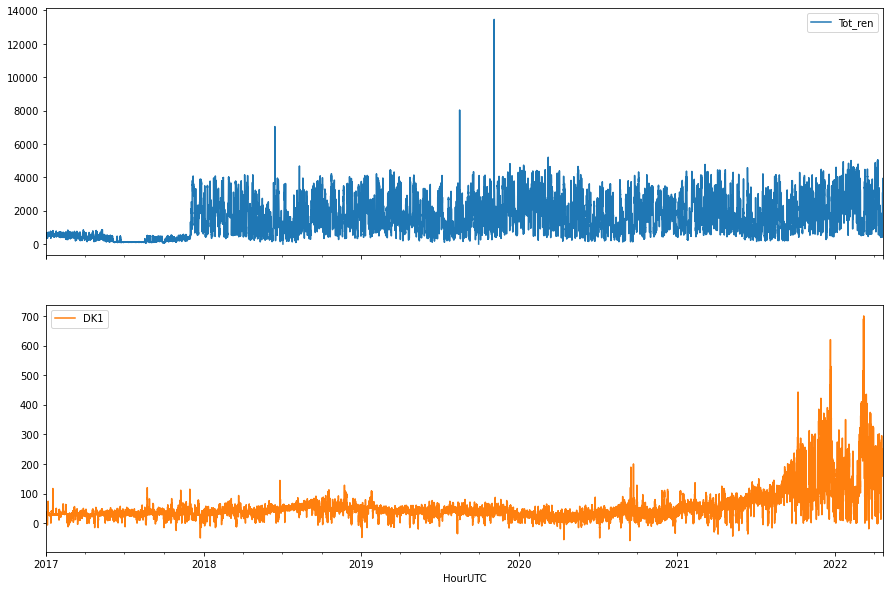

In [9]:
result = enbal_DK1[['Tot_ren']].join(elspot['DK1'], how='outer')
result.corr()
plt.figure(figsize = (15, 10))
result.plot(subplots = True, figsize = (15, 10))


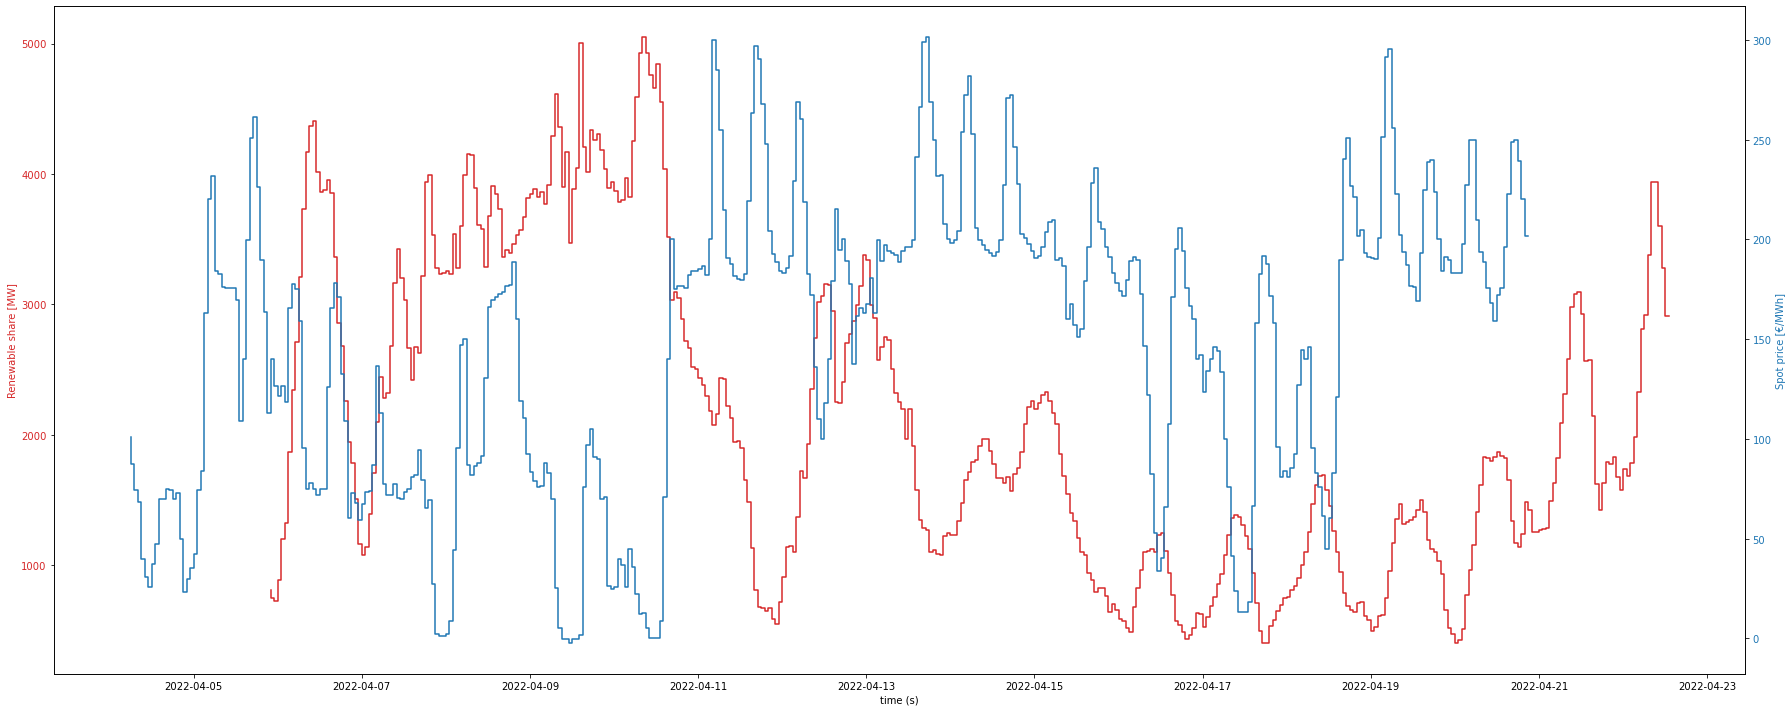

In [10]:
fig, ax1 = plt.subplots(figsize = (25,10))
last_steps = 400
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Renewable share [MW]', color=color)
ax1.step(enbal_DK1.index[-last_steps:], enbal_DK1.Tot_ren[-last_steps:], label = 'DK1', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Spot price [€/MWh]', color=color)  # we already handled the x-label with ax1
ax2.step(elspot.index[-last_steps:], elspot.DK1[-last_steps:], label = 'System', color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
